# Data set 1- Straight line


The value of m as predicted:  2.791124245414918
The value of c as predicted:  3.8488001014307436


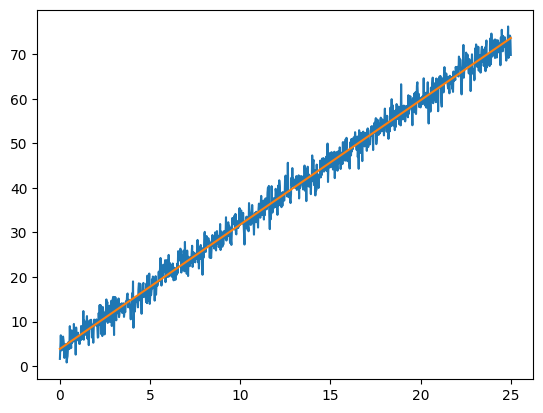

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

%matplotlib inline

def lline(t,m,c):
    return t*m + c

t = np.zeros(1000)
yn = np.zeros(1000)

count = 0

#Reading the data from the file
with open ("APL1.txt") as data1:
    for line in data1:
        t[count] = float(line.split()[0])
        yn[count] = float(line.split()[1])
        count +=1
plt.plot(t,yn)

#Creating M matrix to use least square function curve fit.
M = np.column_stack([t,np.ones(len(t))])

(m,c),_,_,_ = np.linalg.lstsq(M,yn,rcond=None)
ytestl = lline(t,m,c)

plt.plot(t,ytestl)


print("The value of m as predicted: ",m)
print("The value of c as predicted: ",c)


The blue lines denote the data with noise included and the orange line is a clean line without noise which is found using lstsq method. By observing the noise data we can easily conclude that, the fit must be a straigt line. Since for a straight line M matrix can be found, we can use lstsq method to predict the curve (As it more efficient than curve_fit as well for linear functions). By visually interpreting the plot we can say that the curve fit is accurate to a good level.

Standard deviation of noise:  1.9958487870009778


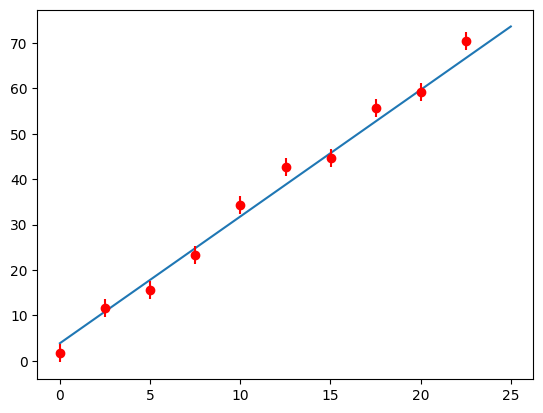

In [3]:
plt.plot(t,ytestl)
noise = yn-ytestl
plt.errorbar(t[::100], yn[::100], np.std(noise), fmt='ro')
print("Standard deviation of noise: ",np.std(noise))


In the above plot error bars are represented by red points. The size of each error bar is basically the length of it. We have defined the error bar to contain the standard deviation of the noise. Hence the size of each bar will be 2x1.9958487870009778 = 3.991697574 (As it extends both the sides)


# Data set 2 - Fourier Series

Plot with the noise 


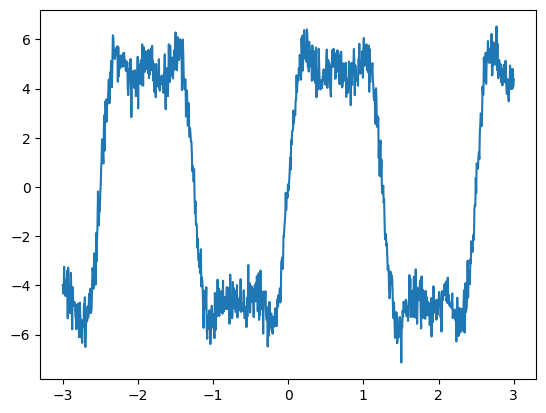

In [4]:
t = []
yn = []
#Getting the data from the file
datas = np.loadtxt("APL2.txt")
for i in datas:
    t.append(i[0])
    yn.append(i[1])
t = np.array(t)
yn = np.array(yn)
print("Plot with the noise ")
plt.plot(t,yn)

Here since the data says it is the sum of harmonices of sines, we can't use lstsq because M matrix can't be found. Hence we can use curve_fit to find the best possible curve.

Right half of the fast fourier transfrom of the nosie curve is :


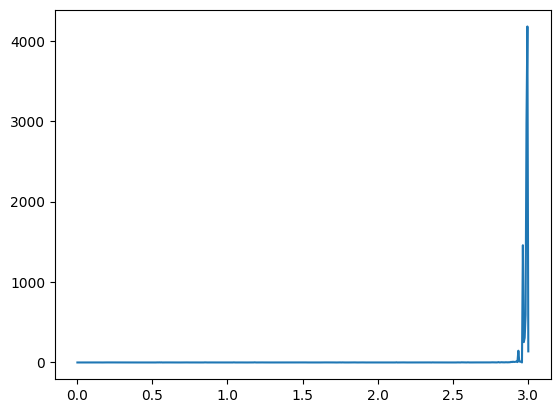

In [6]:
n = len(t)
fhat = np.fft.fft(yn,n) 
PSD = abs(fhat)**2/n #Power spectrum density
print("Right half of the fast fourier transfrom of the nosie curve is :")
plt.plot(t[500:],PSD[500:])

In order to find the how much sin wave adds up to the function, we do fast fourier transform of the noise curve. The number of notable peaks on the right half of the fast fourier transform gives the number of sin waves that adds up to the function.

(2.8, 3.1)

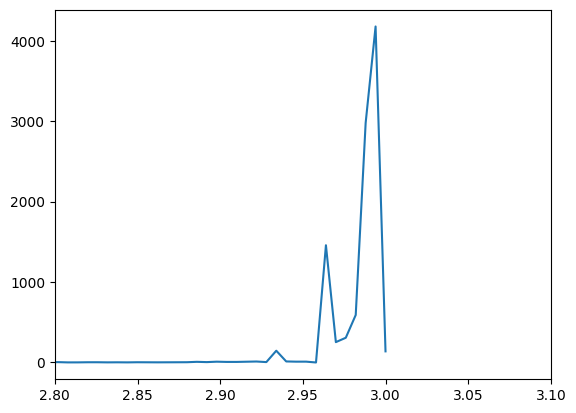

In [7]:
plt.plot(t[500:],PSD[500:])
plt.xlim(2.8,3.1)

The above plot is the zoomed version of the previous plot, so as to find the number of peaks easily. Visually we can easily find that there are three peaks in the plot. Hence the actual curve should be made of three hormonics.

Predicted values: 
a1 = 0.2189211895836202
f1 = -0.12686281023290724
p1 = 3.270568871723222
a2 = -55.821361047906564
f2 = 2.415244388062198
p2 = 3.1350007590770597
a3 = 49.8241333665113
f3 = 2.4025211985851707
p3 = 3.1336915177224065


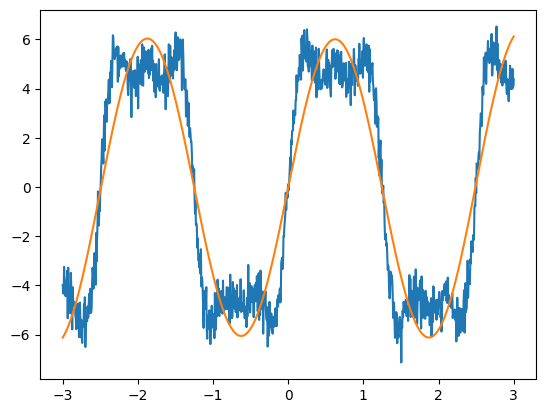

In [54]:
def function(x,a1,f1,p1,a2,f2,p2,a3,f3,p3):
    return a1*np.sin(x*f1+p1)+a2*np.sin(x*f2+p2)+a3*np.sin(x*f3+p3)

param,pcov = curve_fit(function,t,yn,maxfev = 1000000)
print("Predicted values: ")
for i in range(1,4):
    print(f"a{i} = {param[3*i-3]}")
    print(f"f{i} = {param[3*i-2]}")
    print(f"p{i} = {param[3*i-1]}")

ytest = function(t,*param)
plt.plot(t,yn,t,ytest)

The is the plot obtained for when I tried to curve fit using the complete t and yn values. Clearly this does not produce a good fit. So in the next plot, I have tried reducing the range of t and yn.

Predicted values: 
a1 = -194.71940983312263
f1 = 3.0722126599622963
p1 = 3.2557664975800704
a2 = -190.8235711077575
f2 = 3.0845936307798287
p2 = 6.399167221477508
a3 = -109.90439941150122
f3 = 0.015638954394699207
p3 = 0.023137580293188124


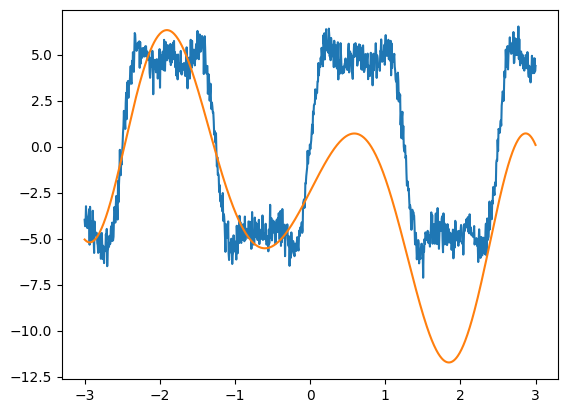

In [55]:
param,pcov = curve_fit(function,t[:500],yn[:500],maxfev = 1000000)
print("Predicted values: ")
for i in range(1,4):
    print(f"a{i} = {param[3*i-3]}")
    print(f"f{i} = {param[3*i-2]}")
    print(f"p{i} = {param[3*i-1]}")
ytest = function(t,*param)
plt.plot(t,yn,t,ytest)


In this case I have taken only the first 500 data points. But still this does not produce a good fit. The possible reason for it lies the way how curve_fit works,i.e., the algorithm used by it. 

Predicted values: 
a1 = 1.9934142971463202
f1 = -7.581404496881641
p1 = -15.78621805085374
a2 = 0.992440629121417
f2 = -12.466660684631421
p2 = -28.110203010935894
a3 = 5.994453165050824
f3 = -2.531076106932146
p3 = -3.176875779217243


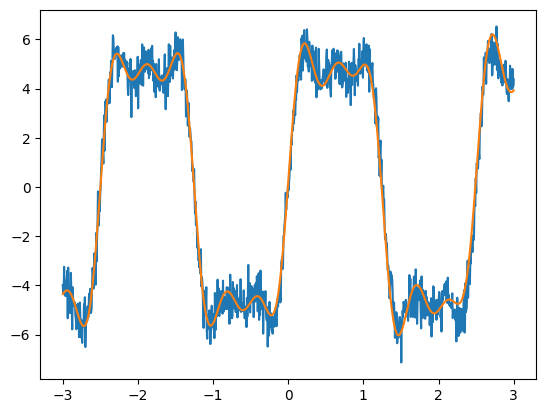

In [56]:
param,pcov = curve_fit(function,t[:290],yn[:290],maxfev = 1000000)
print("Predicted values: ")
for i in range(1,4):
    print(f"a{i} = {param[3*i-3]}")
    print(f"f{i} = {param[3*i-2]}")
    print(f"p{i} = {param[3*i-1]}")
ytest = function(t,*param)
plt.plot(t,yn,t,ytest)


Now I reduced the range of t and yn and made it from 0 to 290, and this produces a good fit.

Standard deviation of noise:  0.5695237513423904


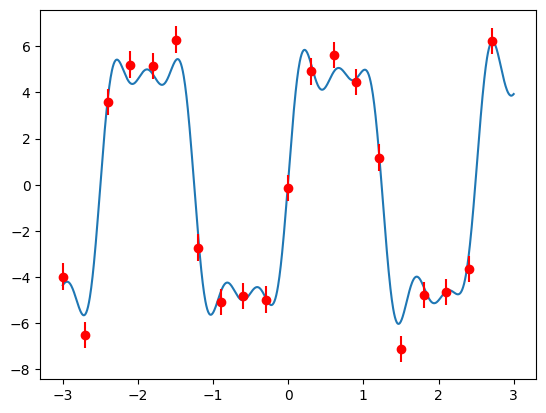

In [57]:
plt.plot(t,ytest)
noise = yn-ytest
plt.errorbar(t[::50], yn[::50], np.std(noise), fmt='ro')
print("Standard deviation of noise: ",np.std(noise))


In this plot the error bars are plotted using the noise array. The length of the error bar is again twice the standard deviation of the noise array which is equal to 1.13904750268.

# Data set 3 - Planck's Constant 

The predicted value of T : 6011.361526398371
The predicted value of h : 6.643229765843849e-34


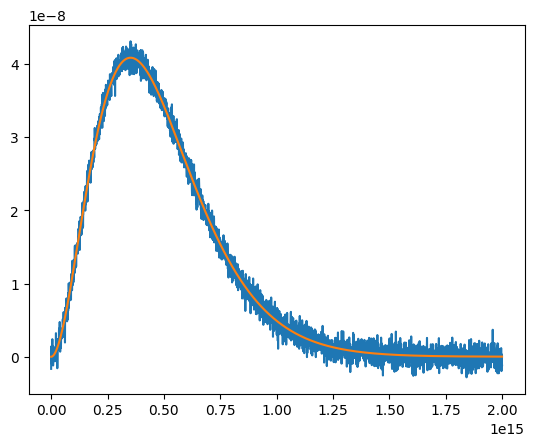

In [58]:
c = 3*1e8
k = 1.38*1e-23

def bbradiation(v,t,h):
    x=2*h*v**3
    y=(h*v)/(k*t)
    return x/((c**2)*(np.exp(y)-1))

t = []
yn = []
datas = np.loadtxt("APL3.txt")
for i in datas:
    t.append(float(i[0]))
    yn.append(float(i[1]))
t = np.array(t)
yn = np.array(yn)
(T,h),_ = curve_fit(bbradiation,t,yn,p0 = [5000,6e-34])
print("The predicted value of T :", T)
print("The predicted value of h :", h)
ytest = bbradiation(t,T,h)
plt.plot(t,yn)
plt.plot(t,ytest)


Since the expression of the function is non-linear, we can't find a M matrix, and hence lstsq function can't be used. So, we use curve_fit function to find the best fit. And the predicted function fits into into noise curve pretty well from the above plot.

Standard deviation of noise:  9.919630672440718e-10


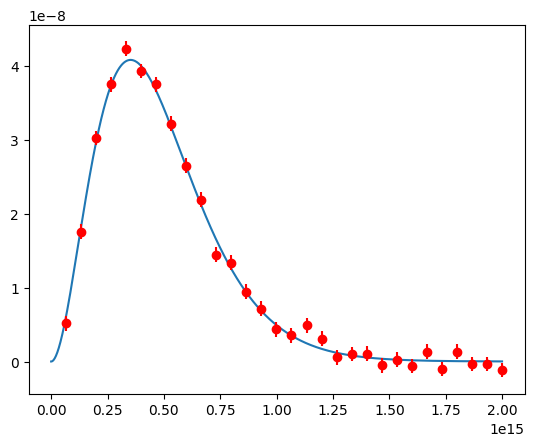

In [59]:
plt.plot(t,ytest)
noise = yn-ytest
plt.errorbar(t[::100], yn[::100], yerr = 1*np.std(noise), fmt='ro')
print("Standard deviation of noise: ",np.std(noise))

Again here error bar denotes the standard deviation of the noise data. The size of it is twice the size of the standard deviation which is equal to : $1.98392613*10^{-9}$

# Data set 4 - Unknown

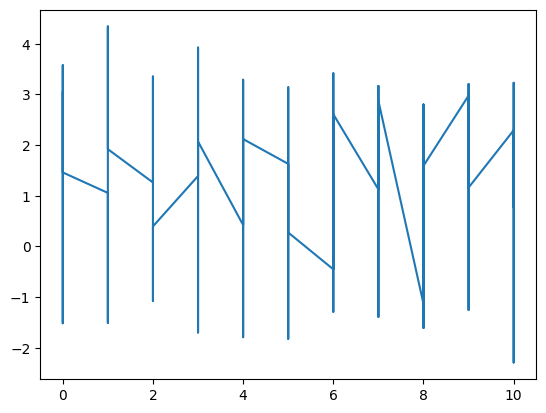

In [60]:
t = np.zeros(1000)
yn = np.zeros(1000)
count = 0
#Reading from the file
with open("APL4.txt") as data2:
    for line in data2:
        t[count] = float(line.split()[0])
        yn[count] = float(line.split()[1])
        count +=1
plt.plot(t,yn)


Since the nature of the plot is very vauge, for each x-axis value I have taken average of all y and finally assigned that average to the x.

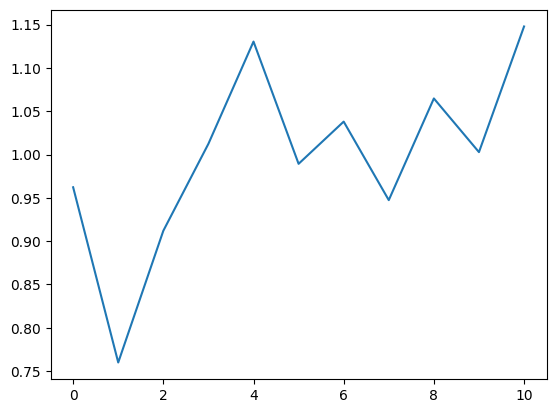

In [61]:
sum = np.zeros(11)
xaxis = np.zeros(11)
for i in range(0,11):
    count =0
    for j in range(0,1000):
        if(int(t[j])==i):
            sum[i] += yn[j]
            count += 1
    sum[i] /= count
    xaxis[i] = i
plt.plot(xaxis,sum)

This is how the plot looks after taking averages as mentioned above. Now since the nature/source of data is unknown, I have done one of simplest curve fits, that is linear regression using the curve_fit function of numpy.

Value of m:  2.791124245414918
Value of c:  300000000.0


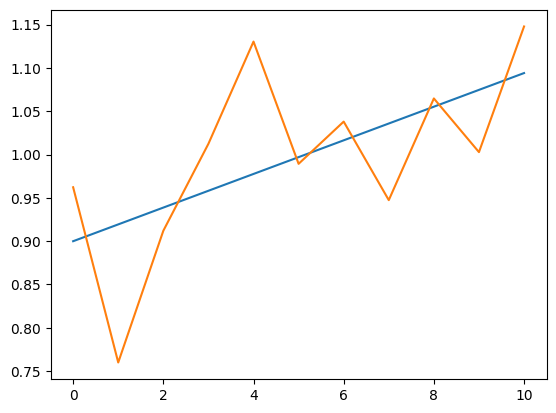

In [62]:
def linearRegression(x,m,c):
    return m*x + c

parm,_ = curve_fit(linearRegression,xaxis,sum)
ynew = linearRegression(xaxis,parm[0],parm[1])
print("Value of m: ",m)
print("Value of c: ",c)
plt.plot(xaxis,ynew,xaxis,sum)

The blue line denotes the curve fit for the orange data.

The standard deviation of the error is:  0.081353725017204


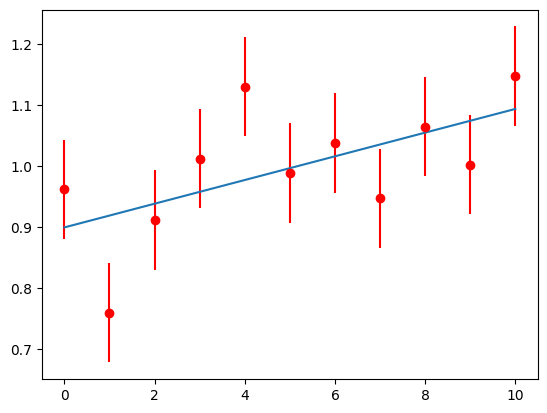

In [63]:
error = sum - ynew
plt.errorbar(xaxis, sum,np.std(error), fmt='ro')
plt.plot(xaxis,ynew)
print("The standard deviation of the error is: ", np.std(error))

Here error bar denotes the standard deviation of the error data. The size of it is twice the size of the standard deviation which is equal to 0.16270745003

# Comparison of straight line fit using lstsq and curve_fit

### Using lstsq from numpy to curve fit

The value of m as predicted:  2.986864166195743
The value of c as predicted:  1.2118270885437261
The coefficient of determination for the predicted line is: 0.9858857925592427
The time of execution for lstsq function is: 
17 µs ± 418 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


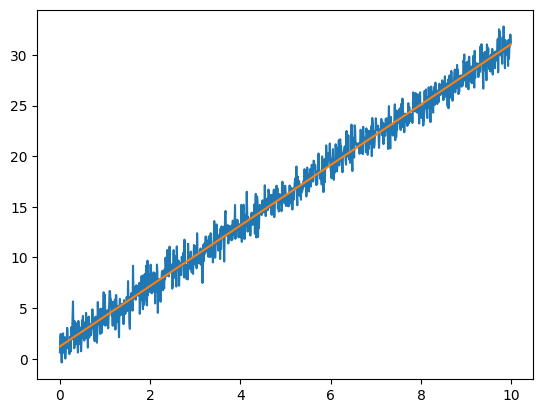

In [64]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print("The value of m as predicted: ",p1)
print("The value of c as predicted: ",p2)
yest = stline(t, p1, p2)
plt.plot(t, yn, t, yest)
r2 = r2_score(yn, yest)
print("The coefficient of determination for the predicted line is:",r2)
print("The time of execution for lstsq function is: ") 
%timeit np.linalg.lstsq(M,yn,rcond=None)

The blue lines denote the data with noise included and the orange line is a clean line without noise which is found using lstsq method. By observing the noise data we can easily conclude that, the fit must be a straigt line. Since for a straigt line M matrix can be found, we can use lstsq method to predict the curve.

Please do note that `r2_score` have been imported from `sklearn.metrics` package inorder to find $r^2$ - coefficent of determination (To comment on the accuracy of the prediction).

### Using curve_fit from scipy to curve fit

The coefficient of determination for the predicted line is: 0.9858857925592427
The time of execution for lstsq function is: 
173 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The value of m as predicted:  2.9868641667782168
The value of c as predicted:  1.2118270914000604


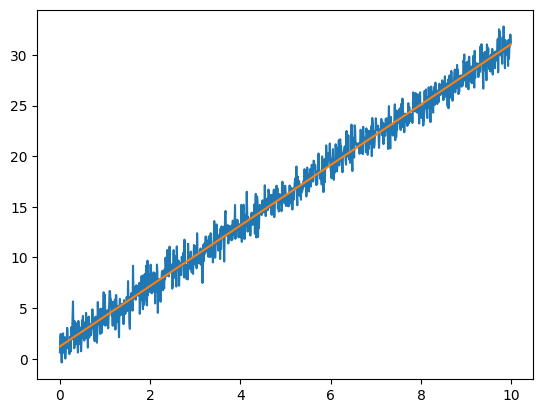

In [65]:
#Using curve_fit from scipy to make predictions
param, _ = curve_fit(stline,t,yn)
ytestc = lline(t,param[0],param[1])
plt.plot(t,yn,t,ytestc)
r2 = r2_score(yn, ytestc)
print("The coefficient of determination for the predicted line is:",r2)
print("The time of execution for lstsq function is: ") 
%timeit curve_fit(lline,t,yn)
print("The value of m as predicted: ",param[0])
print("The value of c as predicted: ",param[1])

#### <strong>Comparison between both methods</strong>

Here I have plotted both the predicted curves in the same plot. The following observations can be made: 

   - Visually we can see that both of them are exactly the same curves</li>
   - The coffeficient of determination ($r^2$) for the both curves are also same. Both are 0.9867343255977217.</li>
   - But the time of execution for lstsq is around 17 µs while for curve_fit it is around 173 µs</li>


So, from the above points we may conclude that, both the methods produce same accuracy for this curve but the curve_fit function takes longer time to execute than lstsq function.